In [44]:
# отправляю второй раз, т.к. нашёл у себя ошибку
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import math

In [178]:
#circ = sts.semicircular(0,1)
#sample = circ.rvs(1000)
# Сначала хотел взять Полукруговой закон Вигнера, но там мат ожидание всегда равно 0
# В итоге взял Распределение Вейбулла
c = 1.5
# c - это некий коэффициент формы (в вики - k, по идее)
sample = sts.weibull_min.rvs(c, size=1000)

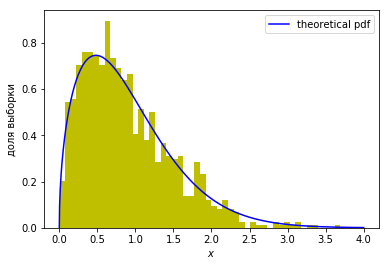

In [182]:
# Плотность
#df = pd.DataFrame(sample, columns=['density'])
# Гистограмма
plt.hist(sample, bins=50, density = True, color='y')
plt.ylabel('доля выборки')
plt.xlabel('$x$')

x = np.linspace(0,4,1000)
#pdf = circ.pdf(x)
pdf = sts.weibull_min.pdf(x, c)​label='theoretical pdf', color='b'
plt.plot(x, pdf, label='theoretical pdf', color='b')
plt.legend()

In [183]:
n1 = 5
n2 = 10
n3 = 100

In [184]:
def one(n):
    i = 0
    z = []
    while i < 1000:
        #c.append(circ.rvs(n))
        #c.append(norm.rvs(n))
        z.append(sts.weibull_min.rvs(c, size=n))
        i=i+1
    return z

# то, чем наполняем наши 1000 выборок

In [185]:
smplOne000 = one(n1)
smplTwo000 = one(n2)
smplThr000 = one(n3)

# а тут запускаем функцию для каждого из "объёмов"

In [186]:
#smplOne000 = []
print(smplOne000[999])

# Проверка

[0.75965384 0.48750589 0.99843316 1.89861065 0.8116376 ]


In [187]:
def vCent(q):
    x = []
    for a in q:
        #for b in a:
        x.append(np.mean(a))
    return x

# А тут находим среднее из наших выборок

In [233]:
smplCentOne = vCent(smplOne000)
smplCentTwo = vCent(smplTwo000)
smplCentThr = vCent(smplThr000)

# Заполняем Средними три массива

In [242]:
#print(smplCentOne[999])

normteorOne = sts.norm(math.gamma(1+(1/c)), math.sqrt((math.gamma(1+(2/c))-(math.gamma(1+(1/c)))**2)/n1))
pdfteorOne = normteorOne.pdf(x)

normteorTwo = sts.norm(math.gamma(1+(1/c)), math.sqrt((math.gamma(1+(2/c))-(math.gamma(1+(1/c)))**2)/n2))
pdfteorTwo = normteorTwo.pdf(x)

normteorThr = sts.norm(math.gamma(1+(1/c)), math.sqrt((math.gamma(1+(2/c))-(math.gamma(1+(1/c)))**2)/n3))
pdfteorThr = normteorThr.pdf(x)

# Посчитали теоретические плотности для трёх наших вариантов

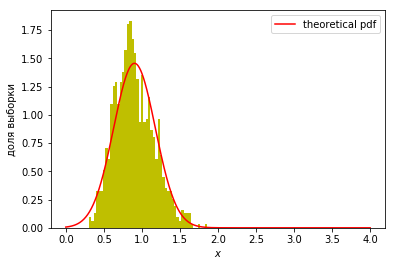

In [243]:
#Первая (5)
plt.hist(smplCentOne, bins=50, density = True, color='y')
plt.ylabel('доля выборки')
plt.xlabel('$x$')


plt.plot(x, pdfteorOne, label='theoretical pdf', color='r')
plt.legend()

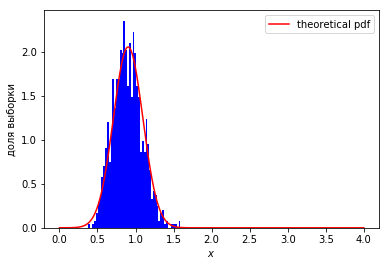

In [244]:
#Вторая (10)
plt.hist(smplCentTwo, bins=50, density = True, color='b')
plt.ylabel('доля выборки')
plt.xlabel('$x$')


plt.plot(x, pdfteorTwo, label='theoretical pdf', color='r')
plt.legend()

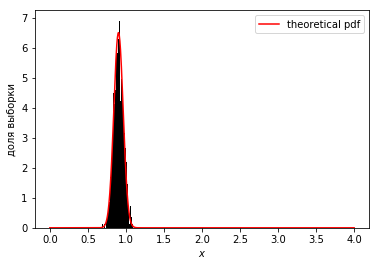

In [245]:
#Третья (100)
plt.hist(smplCentThr, bins=50, density = True, color='k')
plt.ylabel('доля выборки')
plt.xlabel('$x$')


plt.plot(x, pdfteorThr, label='theoretical pdf', color='r')
plt.legend()

In [ ]:
# Я не очень понял, где тут должна быть аппроксимация. Вероятно, что-то делаю не так.
# Подскажите, пожалуйста, в каком моменте я делаю не то, что указано в задании. Спасибо!